In [ ]:
!pip -q install kaggle

In [ ]:
from google.colab import files
files.upload()  # ⬅️ choose kaggle.json from your computer


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ashishgupta271276","key":"689cb8ad7e1b5b1e9f8ec9ae1938e2aa"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset -p /content

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
 98% 2.65G/2.70G [00:29<00:01, 46.9MB/s]
100% 2.70G/2.70G [00:29<00:00, 97.7MB/s]


In [1]:
!mkdir -p /content/plant_disease
!unzip -q /content/drive/MyDrive/archive.zip -d /content/plant_disease

##Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

##Data Preprocessing

###Training Image Preprocessing

In [3]:

training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/plant_disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


###Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/plant_disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [5]:
for x,y in training_set.take(1):
  print(x,x.shape)
  print(y,y.shape)

tf.Tensor(
[[[[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  ...

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     

##Building Model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

###Building Convolution layer

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(32, (3, 3), activation='relu', padding= 'same', input_shape=(128, 128, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size= 2, strides=2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(Conv2D(64, (3, 3), activation='relu', padding= 'same', input_shape=(128, 128, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size= 2, strides=2))

In [10]:
model.add(Conv2D(128, (3, 3), activation='relu', padding= 'same', input_shape=(128, 128, 3)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size= 2, strides=2))

In [11]:
model.add(Conv2D(256, (3, 3), activation='relu', padding= 'same', input_shape=(128, 128, 3)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size= 2, strides=2))

In [12]:
model.add(Conv2D(512, (3, 3), activation='relu', padding= 'same', input_shape=(128, 128, 3)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size= 2, strides=2))

In [13]:
model.add(Dropout(0.25)) #To avoid Overfitting

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500, activation='relu'))
model.add(Dense(units=720, activation='relu'))

In [16]:
model.add(Dropout(0.4))

In [17]:
##Output layer
model.add(Dense(units=38, activation='softmax'))

##Compiling Model

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 720)            │     1,080,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 720)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 38)             │        27,398 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,893,842 (33.93 MB)

 Trainable params: 8,893,842 (33.93 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 164s 67ms/step - accuracy: 0.3608 - loss: 2.2812 - val_accuracy: 0.8147 - val_loss: 0.5880
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 133s 60ms/step - accuracy: 0.8190 - loss: 0.5803 - val_accuracy: 0.8963 - val_loss: 0.3294
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 65ms/step - accuracy: 0.8940 - loss: 0.3314 - val_accuracy: 0.9251 - val_loss: 0.2311
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 133s 61ms/step - accuracy: 0.9295 - loss: 0.2176 - val_accuracy: 0.9299 - val_loss: 0.2196
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 65ms/step - accuracy: 0.9480 - loss: 0.1581 - val_accuracy: 0.9482 - val_loss: 0.1636
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 134s 61ms/step - accuracy: 0.9586 - loss: 0.1288 - val_accuracy: 0.9359 - val_loss: 0.2176
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 65ms/step - accuracy: 0.9638 - loss: 0.1136 - val_accuracy: 0.9546 - val_loss: 0.1492
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 133s 61ms/step - accuracy: 

##Model Evaluation

In [22]:
##Evaluating Model on training_set
train_acc, train_loss = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 0.9840 - loss: 0.0533


In [23]:
print(train_acc, train_loss)

0.05478110536932945 0.9838253259658813


In [24]:
##model on validation set
val_acc, val_loss = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9561 - loss: 0.1609


In [25]:
print(val_acc, val_loss)

0.1708010733127594 0.9545868635177612


##Saving Model

In [27]:
model.save("/content/plant_disease_detection_model.keras")      # Old H5 format

In [31]:
training_history.history

{'accuracy': [0.5626858472824097,
  0.8445693254470825,
  0.903947651386261,
  0.9323707222938538,
  0.9502525329589844,
  0.961860716342926,
  0.9662280678749084,
  0.9745074510574341,
  0.976100742816925,
  0.9796144962310791],
 'loss': [1.4993019104003906,
  0.49565285444259644,
  0.30084192752838135,
  0.20786668360233307,
  0.15441009402275085,
  0.11884969472885132,
  0.10513989627361298,
  0.08184898644685745,
  0.07510609179735184,
  0.0653068944811821],
 'val_accuracy': [0.8147051930427551,
  0.8963122963905334,
  0.9251081347465515,
  0.9299453496932983,
  0.9482130408287048,
  0.9358638525009155,
  0.954643726348877,
  0.945538341999054,
  0.9447416067123413,
  0.9545868635177612],
 'val_loss': [0.5880453586578369,
  0.3294264078140259,
  0.2311050444841385,
  0.21959272027015686,
  0.16360227763652802,
  0.2176292985677719,
  0.1491791009902954,
  0.19745871424674988,
  0.20700281858444214,
  0.17080102860927582]}

In [32]:
## Recording History
import json
with open('training_history.json', 'w') as f:
    json.dump(training_history.history, f)

##Accuracy Visualization

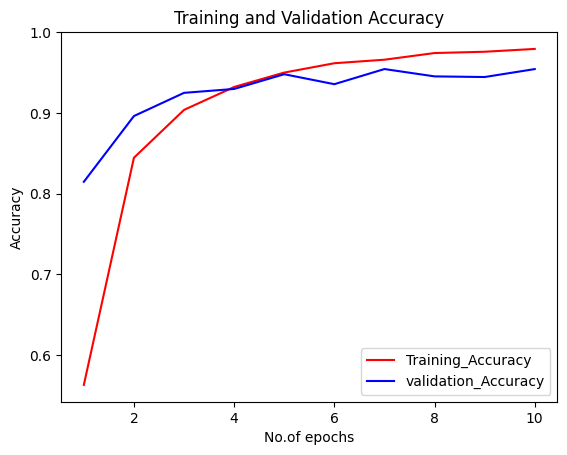

In [51]:
epochs = [i for  i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'], color='red', label='Training_Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'], color='blue', label='validation_Accuracy')
# plt.yticks(np.arange(0.60, 1.01, 0.05))
plt.title('Training and Validation Accuracy')
plt.xlabel('No.of epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##Evaluating model over precision recall and F1 score

In [53]:
class_name = validation_set.class_names

In [54]:
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [55]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/plant_disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [56]:
y_pred = model.predict(test_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step


In [57]:
y_pred.shape

(17572, 38)

In [62]:
predicted_categories = np.argmax(y_pred, axis=1)

In [64]:
true_categories = np.concatenate([y for x, y in test_set], axis=0)

In [65]:
Y_true = np.argmax(true_categories, axis=1)

In [66]:
Y_true

array([ 0,  0,  0, ..., 37, 37, 37])

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_true,predicted_categories,target_names = class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.92      0.96      0.94       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.95      0.98      0.96       440
                                   Apple___healthy       0.93      0.97      0.95       502
                               Blueberry___healthy       0.98      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.94      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.95      0.